# FTR Exercise

## Part 1: Sources with memory

First, import libraries and load Hamlet from file.

In [2]:
f = open('hamlet.txt', 'r')
hamlet = f.read()
f.close()
print(hamlet[:294])

        HAMLET


        DRAMATIS PERSONAE


CLAUDIUS        king of Denmark. (KING CLAUDIUS:)

HAMLET  son to the late, and nephew to the present king.

POLONIUS        lord chamberlain. (LORD POLONIUS:)

HORATIO friend to Hamlet.

LAERTES son to Polonius.

LUCIANUS        nephew to the king.


In [3]:
L = len(hamlet)
L

207039

In [28]:
from math import log2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
H = lambda pr: -sum([pr[a]*log2(pr[a]) for a in pr])
n_max = 100

In [29]:
h = [] # list of all the entropy of by n
for n in tqdm(range(1,n_max)):
    p = {}
    for k in range(len(hamlet)-n):
        key = hamlet[k:(k+n)]
        if key in p:
            p[key] += 1
        else:
            p[key] = 1
    totfreq = sum(list(p.values()))
    for a in p:
        p[a] /= totfreq
    h.append(H(p)/n)

  0%|          | 0/99 [00:00<?, ?it/s]

In [30]:
# print(h)

In [31]:
hstar = [(k+2)*h[k+1]-(k+1)*h[k] for k in range(len(h)-1)]

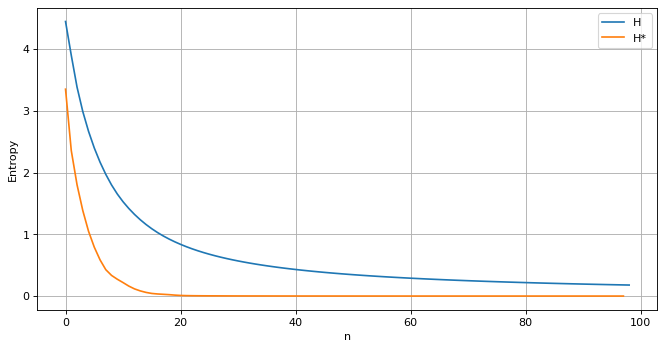

In [35]:
# plot_limit = 200
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(h[:plot_limit], label="H")
plt.plot(hstar[:plot_limit], label="H*")
plt.xlabel('n')
plt.ylabel('Entropy')
plt.legend()
plt.grid()
plt.show()

In [36]:
# calculate log2(L-n)/n

log_data = [log2(abs(L-n))/n for n in range(1, n_max)]

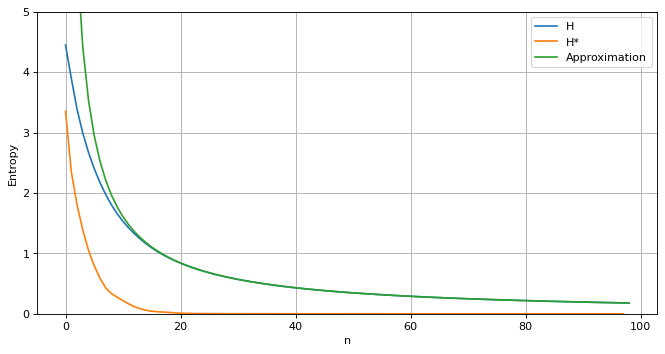

In [37]:
plt.figure(figsize=(10, 5), dpi=80)
plt.ylim(0, 5)
plt.plot(h, label="H")
plt.plot(hstar, label="H*")
plt.plot(log_data, label="Approximation")
plt.xlabel('n')
plt.ylabel('Entropy')
plt.legend()
plt.grid()
plt.show()

## Part 2: Estimating probabilities

First estimate the whole file probabilities of Hamlet so as to get the entropy.

In [40]:
from itertools import groupby
f_tot = dict([(key, len(list(group))) for key, group in groupby(sorted(hamlet))])
Nin = sum([f_tot[a] for a in f_tot])
p_tot = dict([(a,f_tot[a]/Nin) for a in f_tot])

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

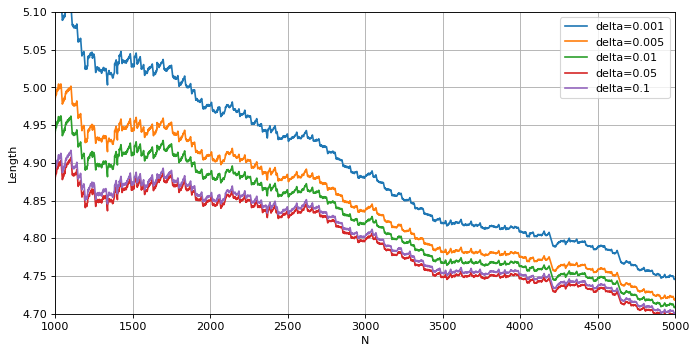

In [61]:
deltas = [0.001, 0.005, 0.01, 0.05, 0.1]
N = 10000 # length of measurement
plt.figure(figsize=(10, 5), dpi=80)
plt.ylim(4.7, 5.1)
plt.xlim(1000, 5000)
for delta in deltas:
    f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
    Ltot = 0
    Lav = []
    for k in tqdm(range(N)):
        p = [x/sum(f) for x in f]
        # calculate length of codeword portion for next symbol
        Ltot += -log2(p[ord(hamlet[k])])
        # record an average length measurement
        Lav.append(Ltot/(k+1))
        # now update probability table
        f[ord(hamlet[k])] += 1
    plt.plot(Lav, label=f"delta={delta}")

# plt.hlines(H(p_tot),0,N,colors='r', label="entropy")
plt.grid()
plt.xlabel('N')
plt.ylabel('Length')
plt.legend() 
plt.show()